# Assignment 4: Pandas

* Section: Sec01
    
* Name: Bryce Owen
    
* Due date:  29 February 2020
    
* Purpose:  Pandas data filtering and analysis with groupby, crosstab, pivot_table and matplot lib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
wage = pd.read_csv('http://barney.gonzaga.edu/~chuang/data/wage.csv')

In [3]:
wage.head()

,FirstName,LastName,MiddleName,Sex,Title,Department,BaseRate,Hours
0,Guy,Gilbert,R,Male,Production Technician - WC60,Production,12.45,32
1,JoLynn,Dobney,M,Female,Production Supervisor - WC60,Production,25.00,33
2,Ruth,Ellerbrock,Ann,Male,Production Technician - WC10,Production,13.45,35
3,Barry,Johnson,K,Male,Production Technician - WC10,Production,13.45,40
4,Sidney,Higa,M,Male,Production Technician - WC10,Production,13.45,45


## No groupby(), crosstab(), or pivot_table()

In [23]:
#How many employees are in the Finance department?

wage[wage['Department'] == 'Finance'].count()[0]

10

In [7]:
# What is the mean of working hours of employees in the Production department?  

round(wage[wage['Department'] == 'Production']['Hours'].mean(),2)

37.79

In [22]:
# How many male employees are in the Sales department?

wage[(wage['Department'] == 'Sales') & (wage['Sex'] == 'Male')].count()[0]

16

In [19]:
# What is the mean of weekly wages of female employees in the Marketing department?

wage = wage.assign(WeeklyWages = wage['BaseRate'] * wage['Hours'])
round(wage[(wage['Department'] == 'Marketing') & (wage['Sex'] == 'Female')]['WeeklyWages'].mean(),2)

496.8

## Groupby(), crosstab(), or pivot_table() allowed

In [25]:
# What are the totals of weekly wages of female and male employees?

wage.groupby('Sex')[['WeeklyWages']].sum()    

,WeeklyWages
Sex,
Female,36652.192
Male,168600.804


In [29]:
# What are the numbers of male and female employees in the Marketing, Production, and Human Resources Departments? 

wage_MPHR = wage[(wage['Department'] == 'Marketing') | (wage['Department'] == 'Production') | (wage['Department'] == 'Human Resources')]
pd.crosstab(index = wage_MPHR['Department'], columns = wage_MPHR['Sex'], values = wage_MPHR['LastName'], aggfunc = 'count')

Sex,Female,Male
Department,,
Human Resources,3,3
Marketing,3,7
Production,31,148


In [34]:
# What are the means of weekly wages of the Marketing, Production and Engineering departments?

wage_MPE = wage[(wage['Department'] == 'Marketing') | (wage['Department'] == 'Production') | (wage['Department'] == 'Engineering')]
wage_MPE.pivot_table(index = 'Department', values = 'WeeklyWages', aggfunc = 'mean')

,WeeklyWages
Department,
Engineering,1542.064500
Marketing,643.081000
Production,534.797486


In [37]:
# What are the totals of weekly wages of male and female employees across departments using Pivot_table()?

wage.pivot_table(index = 'Department', columns = 'Sex', values = 'WeeklyWages', aggfunc = 'sum')

Sex,Female,Male
Department,,
Document Control,NaN,2962.030
Engineering,2475.018,6777.369
Executive,NaN,9025.200
Facilities and Maintenance,693.750,2901.113
Finance,2629.029,6837.132
Human Resources,1909.796,1940.836
Information Services,1850.488,9536.135
Marketing,1490.398,4940.412
Production,16622.200,79106.550


# Matplotlib

<BarContainer object of 2 artists>

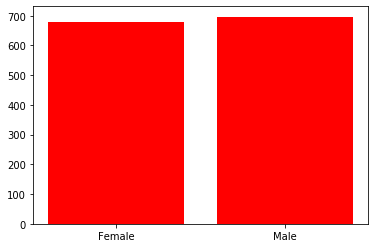

In [59]:
# How are mean wages different between females and males?  

mean_wages = wage['WeeklyWages'].groupby(wage['Sex']).mean()
x1 = mean_wages.index
y1 = mean_wages.values
plt.bar(x1, y1, align = 'center', color = 'red')

<BarContainer object of 16 artists>

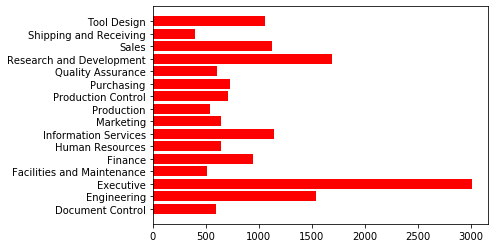

In [57]:
# How are mean wages different between departments?  

mean_wages = wage['WeeklyWages'].groupby(wage['Department']).mean()
x1 = mean_wages.index
y1 = mean_wages.values
plt.barh(x1,y1, align = 'center', color = 'red')